In [1]:
using Pkg
Pkg.activate("C:/Users/lisah/Documents/Repos/ma-code")
include("c:/Users/lisah/Documents/Repos/ma-code/src/src.jl")
using .Src

  Activating project at `C:\Users\lisah\Documents\Repos\ma-code`


In [16]:
# set true model parameters
a_true = 0.5 # left of bifurcation point
m_true = 0.45
n0_true = 1.5
w0 = 1.0
M = 100 # number of measurements
noise = 0.5

# create parameter object for trial
hprm = Hyperprm(w0, n0_true, a_true, m_true, M, noise);

## fixed time window, observe from t=0

In [ ]:
# infer a,m parameter
prm_keys = [:a, :m]

# observation time window fixed
t_fixed = true

In [6]:
# inverse uq and practica identifiability
r = assess_practical_identifiability(prm_keys, hprm, t_fixed=t_fixed)

(mle = [0.5059539989181033, 0.4783900989334561], plot_mles = Plot{Plots.GRBackend() n=12}, plot_losses = Plot{Plots.GRBackend() n=3}, cor = [1.0 0.30869427204771593; 0.3086942720472258 1.0], cov = [0.0053304105992562426 0.0018133665017532996; 0.0018133665017504204 0.006473711952932136], gaussian_heatmap = Plot{Plots.GRBackend() n=1}, gaussian_surface = Plot{Plots.GRBackend() n=2})

In [7]:
# forward uq
rf = forward_uq(r.mle, r.cov, prm_keys, [a_true, m_true], t_fixed=t_fixed)

(trajectories = Plot{Plots.GRBackend() n=204}, sample_dens_n = Plot{Plots.GRBackend() n=2}, sample_dens_w = Plot{Plots.GRBackend() n=2})

#### analyze plots

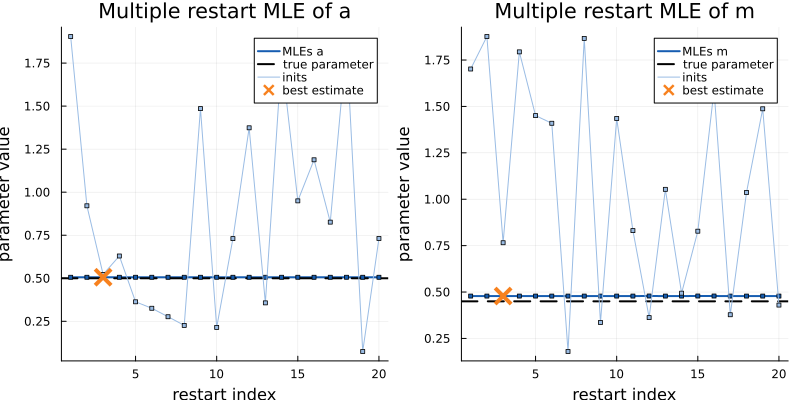

In [8]:
r.plot_mles

MLE is very close to true value and MLE is found in every optimization restart

In [9]:
r.cor

2×2 Matrix{Float64}:
 1.0       0.308694
 0.308694  1.0

correlation of a and m is quite low, which is also depicted in the surface of the Gaussian.

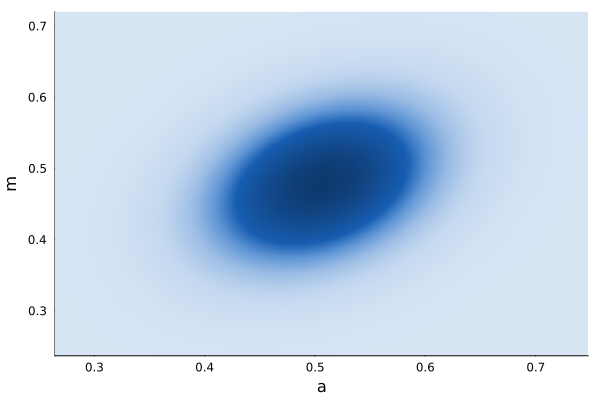

In [10]:
r.gaussian_heatmap

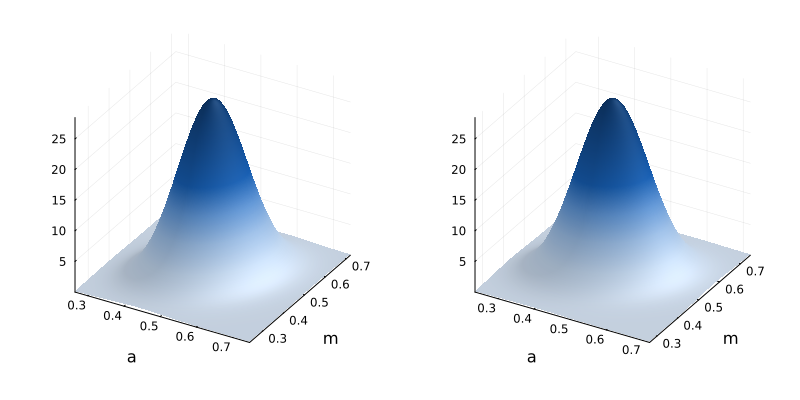

In [11]:
r.gaussian_surface

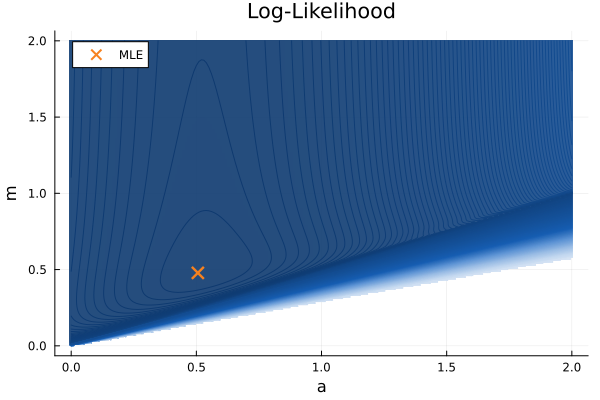

In [15]:
analyze_ll(r.mle, prm_keys, hprm, -1000, t_fixed=t_fixed)

Q: it seems like MLE is not at maximum? -> maybe curve around maximum is comparably flat, so not enough levels are shown in the plot to clearly mark the maximum

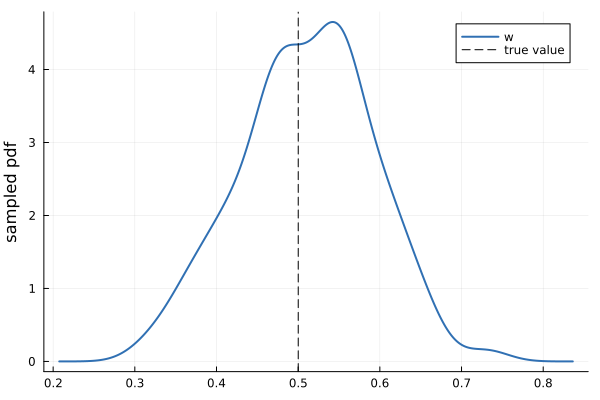

In [13]:
rf.sample_dens_w

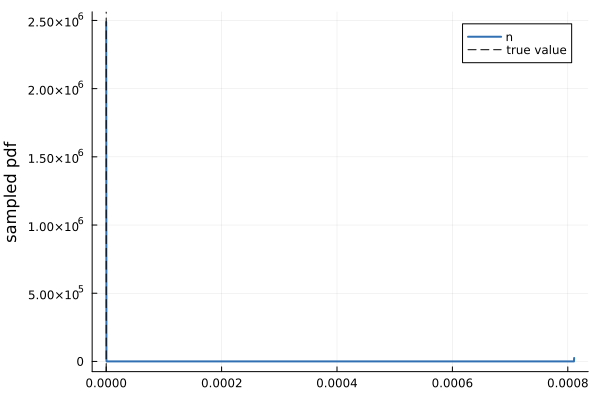

In [14]:
rf.sample_dens_n

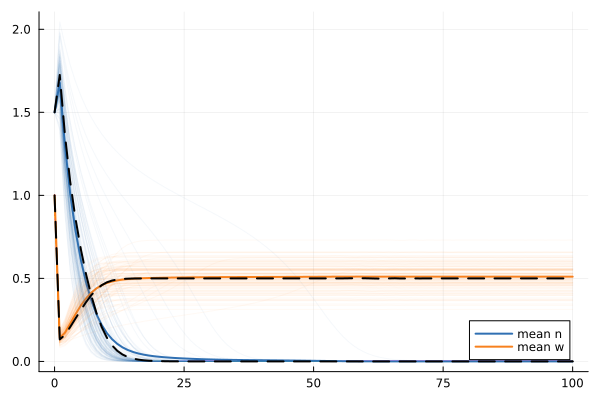

In [38]:
rf.trajectories

Biomass converges to plant-free equlibrium, whilst water stabilized around value of water input parameter a.

Conclusion: both a,m can be inferred

## fixed time window, observe in stable state only

In [57]:
# infer a,m parameter
prm_keys = [:a, :m]

# observation time window fixed
t_fixed = true

# observations in stable state only
obs_late = true
t_end = 200.0; # observe system for a longer time in this case

In [58]:
# inverse uq and practica identifiability
rl = assess_practical_identifiability(prm_keys, hprm, t_fixed=t_fixed, obs_late=obs_late, t_end=t_end)

DomainError: DomainError with -337.50565906406996:
sqrt was called with a negative real argument but will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).
DomainError detected in the user `f` function. This occurs when the domain of a function is violated.
For example, `log(-1.0)` is undefined because `log` of a real number is defined to only output real
numbers, but `log` of a negative number is complex valued and therefore Julia throws a DomainError
by default. Cases to be aware of include:

* `log(x)`, `sqrt(x)`, `cbrt(x)`, etc. where `x<0`
* `x^y` for `x<0` floating point `y` (example: `(-1.0)^(1/2) == im`)

Within the context of SciML, this error can occur within the solver process even if the domain constraint
would not be violated in the solution due to adaptivity. For example, an ODE solver or optimization
routine may check a step at `new_u` which violates the domain constraint, and if violated reject the
step and use a smaller `dt`. However, the throwing of this error will have halted the solving process.

Thus the recommended fix is to replace this function with the equivalent ones from NaNMath.jl
(https://github.com/JuliaMath/NaNMath.jl) which returns a NaN instead of an error. The solver will then
effectively use the NaN within the error control routines to reject the out of bounds step. Additionally,
one could perform a domain transformation on the variables so that such an issue does not occur in the
definition of `f`.

For more information, check out the following FAQ page:
<https://docs.sciml.ai/Optimization/stable/API/FAQ/#The-Solver-Seems-to-Violate-Constraints-During-the-Optimization,-Causing-DomainErrors,-What-Can-I-Do-About-That?>


In [46]:
# forward uq
rlf = forward_uq(rl.mle, rl.cov, prm_keys, [a_true, m_true], t_fixed=t_fixed, obs_late=obs_late, t_end=t_end, t_pt_sample_dens=25)
# !!! Error for t_pt_sample_dens=75 ?? why array of length 50?

(trajectories = Plot{Plots.GRBackend() n=204}, sample_dens_n = Plot{Plots.GRBackend() n=2}, sample_dens_w = Plot{Plots.GRBackend() n=2})

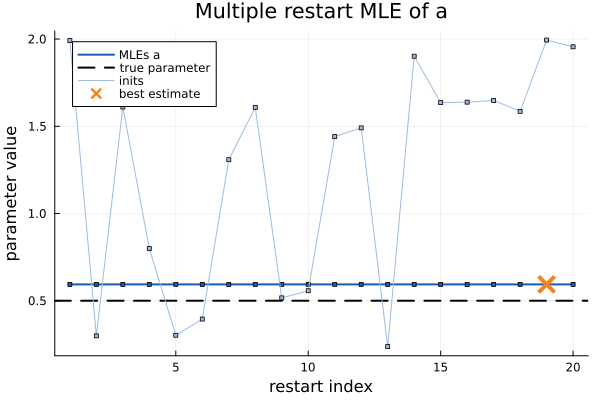

In [47]:
rl.plot_mles

apparently there are many local maxima for m

In [48]:
rl.cor

1×1 Matrix{Float64}:
 1.0

In [49]:
rl.gaussian_heatmap

In [ ]:
analyze_ll(rl.mle, prm_keys, hprm, -1000, t_fixed=t_fixed, obs_late=obs_late, t_end=200.0)

In [51]:
#rlf.trajectories
#TODO: make this work also for late sampling.

likelihood is basically flat into m direction -> no unique maximum can be found.

Conclusion: a and m are not identifiable. -> try to infer only a.

In [60]:
# infer a parameter
prm_keys = [:a];

In [61]:
# inverse uq and practica identifiability
rl = assess_practical_identifiability(prm_keys, hprm, t_fixed=t_fixed, obs_late=obs_late, t_end=t_end)

(mle = [0.5220839516682995], plot_mles = Plot{Plots.GRBackend() n=6}, plot_losses = Plot{Plots.GRBackend() n=3}, cor = [1.0;;], cov = [0.010000320582420886;;], gaussian_heatmap = nothing, gaussian_surface = Plot{Plots.GRBackend() n=1})

In [62]:
# forward uq
rlf = forward_uq(rl.mle, rl.cov, prm_keys, [a_true], t_fixed=t_fixed, obs_late=obs_late, t_end=t_end, t_pt_sample_dens=25)

(trajectories = Plot{Plots.GRBackend() n=204}, sample_dens_n = Plot{Plots.GRBackend() n=2}, sample_dens_w = Plot{Plots.GRBackend() n=2})

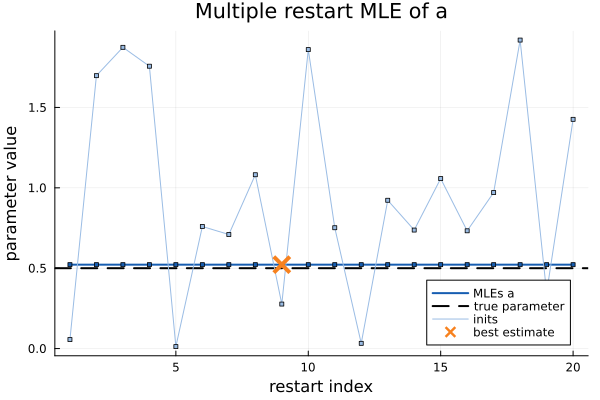

In [63]:
rl.plot_mles

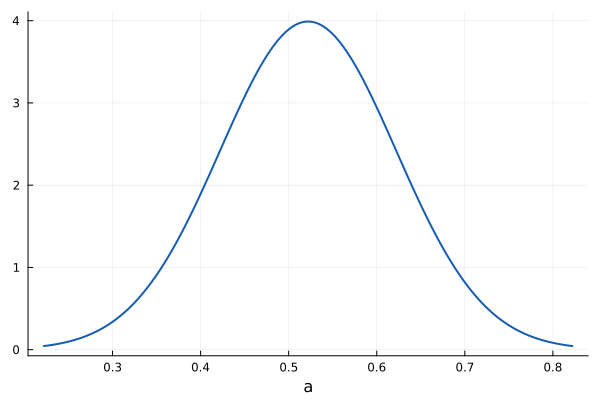

In [64]:
rl.gaussian_surface

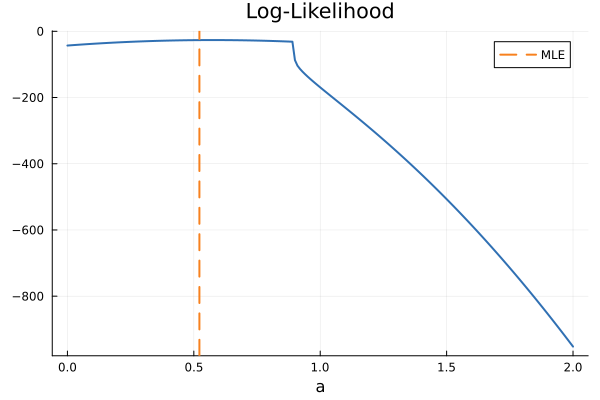

In [65]:
analyze_ll(rl.mle, prm_keys, hprm, -1000, t_fixed=t_fixed, obs_late=obs_late, t_end=200.0)